In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [2]:
#import sys
#sys.path.append('C:\\Users\\kevin\\AppData\\Local\\Programs\\Python\\Python38\\Scripts')

In [2]:
stop_words = list(set(stopwords.words('english')))

In [4]:
col_names = ["Sentiment", "Tweet_ID", "Date", "Query", "Handle", "Text"]
tweet_df = pd.read_csv("C:\\Users\\kevin\\Documents\\jupyter notebooks\\twitter\\sentiment training data\\training.1600000.processed.noemoticon.csv", names=col_names, encoding='ISO-8859-1')

In [5]:
tweet_df.head()

,Sentiment,Tweet_ID,Date,Query,Handle,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


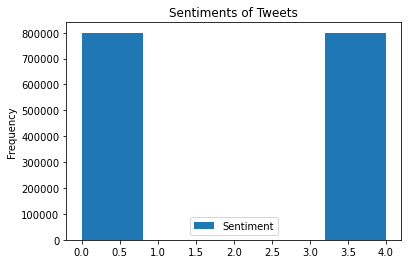

In [6]:
tweet_df[['Sentiment']].plot.hist(bins=5, title="Sentiments of Tweets")

In [7]:
tweet_df['Sentiment'].value_counts()

4    800000
0    800000
Name: Sentiment, dtype: int64

In [8]:
import re

In [10]:
#remove mentions of other twitter handles
preprocess_list = []
tweet_preprocessed = ''

for text in tweet_df['Text']:
    #remove mentions of other twitter handles
    tweet_preprocessed = re.sub(r'(^|[^@\w])@(\w{1,15})\b', '', text)
    #remove hashtags
    tweet_preprocessed = re.sub(r'(^|[^#\w])#\w\b', '', tweet_preprocessed)
    #remove urls starting with http or https
    tweet_preprocessed = re.sub(r'https{0,1}:\/\/\S*', '', tweet_preprocessed)
    #replace emojis with text
    for emot in UNICODE_EMO:
        tweet_preprocessed = tweet_preprocessed.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    
    
    preprocess_list.append(tweet_preprocessed)
    
tweet_df['Preprocessed Text'] = preprocess_list






In [3]:
#write this to a csv so we can start with it next time
#tweet_df.to_csv(r'path\to\file\preprocessed tweets 1_6M.csv', index=False)

#use this line if you've already preprocessed the text and can pull it from an existing csv. 
#tweet_df = pd.read_csv(r'path\to\file\preprocessed tweets 1_6M.csv')

###Look for preprocessed text that's nan.  if it exists, get rid of it. 

In [22]:
tweet_df['Preprocessed Text'].count()/len(tweet_df['Preprocessed Text'])

0.99999375

In [24]:
tweet_df = tweet_df[tweet_df['Preprocessed Text'].notna()]

In [25]:
tweet_df['Preprocessed Text'].count()/len(tweet_df['Preprocessed Text'])

1.0

In [4]:
tweet_df.head()

,Sentiment,Tweet_ID,Date,Query,Handle,Text,Preprocessed Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


#Naive Bayes with nltk

In [6]:

import nltk

In [8]:
def format_sentence(sent):
  return({word: True for word in nltk.word_tokenize(sent)})

In [28]:
pos_tweets_list = []
neg_tweets_list = []

for index, row in tweet_df.iterrows():
    if row['Sentiment'] == 0:
        neg_tweets_list.append([format_sentence(row['Preprocessed Text']), 'neg'])
    elif row['Sentiment'] == 4:
        pos_tweets_list.append([format_sentence(row['Preprocessed Text']), 'pos'])
    else:
        print("Row: ", str(index), " is not positive or negative.")

In [31]:
neg_tweets_list[55]

[{'Not': True,
  'sure': True,
  'what': True,
  'they': True,
  'are': True,
  ',': True,
  'only': True,
  'that': True,
  'PoS': True,
  '!': True,
  'As': True,
  'much': True,
  'as': True,
  'I': True,
  'want': True,
  'to': True,
  'dont': True,
  'think': True,
  'can': True,
  'trade': True,
  'away': True,
  'company': True,
  'assets': True,
  'sorry': True,
  'andy': True},
 'neg']

In [33]:
def split_docs(pos, neg, ratio):
  train = pos[:int((1-ratio)*len(pos))] + neg[:int((1-ratio)*len(neg))]
  test = pos[int((ratio)*len(pos)):] + neg[int((ratio)*len(neg)):]
  return train, test

In [34]:
Xy_train, Xy_test = split_docs(pos_tweets_list, neg_tweets_list, 0.2)

In [35]:
from nltk.classify import NaiveBayesClassifier

In [36]:
classifier = NaiveBayesClassifier.train(Xy_train)
classifier.show_most_informative_features()

Most Informative Features
                saddened = True              neg : pos    =     85.7 : 1.0
                    Poem = True              pos : neg    =     80.3 : 1.0
             squarespace = True              neg : pos    =     75.2 : 1.0
                     228 = True              neg : pos    =     49.7 : 1.0
                     447 = True              neg : pos    =     46.1 : 1.0
                     ftl = True              neg : pos    =     37.7 : 1.0
                    Died = True              neg : pos    =     37.0 : 1.0
             shareholder = True              pos : neg    =     36.3 : 1.0
           Disappointing = True              neg : pos    =     33.0 : 1.0
                    sadd = True              neg : pos    =     32.6 : 1.0


In [37]:
from nltk.classify.util import accuracy

In [38]:
print(accuracy(classifier, Xy_test))

0.795966852943727


#Naive Bayes with sklearn

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn import metrics

In [43]:
#try this one without stop_words.
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Preprocessed Text'])

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

In [46]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)

cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)

bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)


print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')



MNB Accuracy: 78.26%
CNB Accuracy: 78.26%
BNB Accuracy: 77.78%


In [49]:
#try with stopwords
cv = CountVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Preprocessed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Naive Bayes with Stopwords:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with Stopwords:
MNB Accuracy: 76.91%
CNB Accuracy: 76.91%
BNB Accuracy: 77.01%


In [52]:
#try with bigrams
cv = CountVectorizer(ngram_range = (2,2),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Preprocessed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Naive Bayes with bigrams:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with bigrams:
MNB Accuracy: 78.95%
CNB Accuracy: 78.95%
BNB Accuracy: 79.14%


In [53]:
#try with 1-grams, bigrams
cv = CountVectorizer(ngram_range = (1,2),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Preprocessed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Naive Bayes with 1-grams, bigrams:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with 1-grams, bigrams:
MNB Accuracy: 80.34%
CNB Accuracy: 80.34%
BNB Accuracy: 79.90%


#Use TF-IDF to transform tweets. 

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [56]:
tfidf = TfidfVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
text_count_2 = tfidf.fit_transform(tweet_df['Preprocessed Text'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_df['Sentiment'],test_size=0.2,random_state=5)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, y_test)

CNB = ComplementNB()
CNB.fit(x_train, y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(x_test),y_test)

BNB = BernoulliNB()
BNB.fit(x_train, y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)

print('Naive Bayes with Tf-idf, 1-grams:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with Tf-idf, 1-grams:
MNB Accuracy: 77.67%
CNB Accuracy: 77.66%
BNB Accuracy: 77.78%


In [57]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize)
text_count_2 = tfidf.fit_transform(tweet_df['Preprocessed Text'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_df['Sentiment'],test_size=0.2,random_state=5)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, y_test)

CNB = ComplementNB()
CNB.fit(x_train, y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(x_test),y_test)

BNB = BernoulliNB()
BNB.fit(x_train, y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)

print('Naive Bayes with Tf-idf, 1-grams, stop words:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with Tf-idf, 1-grams, stop words:
MNB Accuracy: 76.32%
CNB Accuracy: 76.32%
BNB Accuracy: 77.01%


In [58]:
tfidf = TfidfVectorizer(ngram_range = (1,2),tokenizer = token.tokenize)
text_count_2 = tfidf.fit_transform(tweet_df['Preprocessed Text'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_df['Sentiment'],test_size=0.2,random_state=5)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, y_test)

CNB = ComplementNB()
CNB.fit(x_train, y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(x_test),y_test)

BNB = BernoulliNB()
BNB.fit(x_train, y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)

print('Naive Bayes with Tf-idf, 1-grams and 2-grams:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Naive Bayes with Tf-idf, 1-grams and 2-grams:
MNB Accuracy: 80.53%
CNB Accuracy: 80.53%
BNB Accuracy: 79.90%


#Try stemming the tweets 

In [59]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [60]:

porter = PorterStemmer()
updated_tweets = []

for text in tweet_df['Preprocessed Text']:
    tokenize_tweet = word_tokenize(text)
    stemmed_text = []
    for word in tokenize_tweet:
        stemmed_text.append(porter.stem(word))
        stemmed_text.append(" ")
    updated_tweets.append("".join(stemmed_text))

tweet_df['Stemmed Text'] = updated_tweets
        
    
    

In [27]:
'''
porter = PorterStemmer()

test_string = "I was living unsubstantially in an underground bunker smiling, eating, and masticating"
tokenize_test = word_tokenize(test_string)
stem_test = []
for word in tokenize_test:
    stem_test.append(porter.stem(word))
    stem_test.append(" ")
    
print("".join(stem_test))
'''

I wa live unsubstanti in an underground bunker smile , eat , and mastic 


In [63]:
tweet_df.head()

,Sentiment,Tweet_ID,Date,Query,Handle,Text,Preprocessed Text,Stemmed Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Da...","- awww , that 's a bummer . you shoulda got da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he ca n't updat hi facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,I dive mani time for the ball . manag to save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole bodi feel itchi and like it on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","no , it 's not behav at all . i 'm mad . whi a..."


In [64]:
tweet_df['Stemmed Text'][101]

'I hope they will increas the capac fast , yesterday wa such a pain . got the fail whale +15 time in 2 hour .... '

In [65]:
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Stemmed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Stemmed Naive Bayes:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Stemmed Naive Bayes:
MNB Accuracy: 77.83%
CNB Accuracy: 77.83%
BNB Accuracy: 77.12%


In [67]:
cv = CountVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Stemmed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Stemmed Naive Bayes with Stopwords:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Stemmed Naive Bayes with Stopwords:
MNB Accuracy: 76.56%
CNB Accuracy: 76.56%
BNB Accuracy: 76.63%


In [68]:
# 1-gram, 2-gram stemmed tweets

cv = CountVectorizer(ngram_range = (1,2),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweet_df['Stemmed Text'])

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweet_df['Sentiment'], test_size=0.2, random_state=5)

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predicted = MNB.predict(X_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, Y_test)

CNB = ComplementNB()
CNB.fit(X_train, Y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Stemmed Naive Bayes with 1-gram and 2-gram:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Stemmed Naive Bayes with 1-gram and 2-gram:
MNB Accuracy: 80.11%
CNB Accuracy: 80.11%
BNB Accuracy: 79.54%


In [69]:
tfidf = TfidfVectorizer(ngram_range = (1,2),tokenizer = token.tokenize)
text_count_2 = tfidf.fit_transform(tweet_df['Stemmed Text'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, tweet_df['Sentiment'],test_size=0.2,random_state=5)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
mnb_accuracy_score = metrics.accuracy_score(predicted, y_test)

CNB = ComplementNB()
CNB.fit(x_train, y_train)
cnb_accuracy_score = metrics.accuracy_score(CNB.predict(x_test),y_test)

BNB = BernoulliNB()
BNB.fit(x_train, y_train)
bnb_accuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)

print('Stemmed Naive Bayes with Tf-idf, 1-grams and 2-grams:')
print(str('MNB Accuracy: {:04.2f}'.format(mnb_accuracy_score*100))+'%')
print(str('CNB Accuracy: {:4.2f}'.format(cnb_accuracy_score*100))+'%')
print(str('BNB Accuracy: {:4.2f}'.format(bnb_accuracy_score*100))+'%')

Stemmed Naive Bayes with Tf-idf, 1-grams and 2-grams:
MNB Accuracy: 80.26%
CNB Accuracy: 80.25%
BNB Accuracy: 79.54%
